# Scikit-learn for K-means clustering

## Learning Objectives
* Gain a high-level understanding of what is machine learning, and why you should or shouldn’t use it
* Apply `scikit-learn` and other data science Python libraries for K-means clustering and data visualization
* Develop proficiency in asking questions about data and analyzing data / model results

### Before we get started, here are some tips for beginners:
* Be gentle on yourself: we'll be covering a wide range of topics related to programming and data science. 
* Pause and revisit concepts as needed. Repetition will help solidify understanding of topics.
* If you don't understand something, there are many sources out there that can help you: 
  * You can read the documentation for a specific library or function.
  * Googling concepts or visiting StackOverflow is another great way to learn about common issues you'll encounter.
  * Finally, ChatGPT can be helpful for co-coding and getting started with ideas, but be wary of its answers.
* Don't be afraid to make mistakes.

## 1. What is machine learning?

### What is machine learning?
The essence of machine learning is:
* Getting **data** related to a particular subject area or problem
* Using programming and mathematics to identify and learn patterns within the data
* Storing these learned patterns in a **model**
* Using the model for different tasks:
  * **Supervised Learning**: Predict numeric values or categories based on associated attributes
  * **Unsupervised Learning**: Group similar objects together 
  * **Semi-Supervised Learning**: Group data into labels (unsupervised)and make predictions (supervised)
  * **Reinforcement Learning**: Have a model interact with the environment and learn best actions to take.

### Why and when to use machine learning?
Machine learning can be used to save time, effort, and capital. You're having a computer do all of the heavy lifting for tedious, repetitve, and mundane tasks instead of a human.

**Below are some situations when you would want to use machine learning:**
* There are patterns in the data that are predictable.
* The patterns are hard for humans to make decisions / take action, but are easily understood by computers.
* There is data that is representative of the problem you want to solve.
* Incoming or new data (likely) shares the patterns with your dataset.

### Check-in 1: Think about situations where machine learning is NOT useful? What are some situations where you wouldn't want to use machine learning?

### When NOT to use machine learning
While machine learning is useful for many things, it's not a catch-all. There are many situations where you wouldn't want to, or could apply machine learning. 

**Here are some scenarios where you wouldn't want to use ML:**
* The event you're trying to predict doesn't have a distinct pattern
* The problem you're trying to solve is simple.
* It's not cost effective to implement ML.
* It's unethical to apply ML for a given problem.

## 2. Overview of `scikit-learn` and Clustering

### What is `scikit-learn`?
[`scikit-learn`](https://scikit-learn.org/stable/) is a popular Python library that is used for several common machine learning tasks. It is built on other data science libraries such as `NumPy`, `SciPy`, and `matplotlib` and is well-integrated in many data science environments and workflows. 

We’ll go over how to train a machine learning model called K-means clustering using `scikit-learn`, and other common data science libraries for data analysis on the [Iris](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) dataset. But first, let's install the Python libraries we need for this session. 

A short description of each library is provided below, with a link to the documentation. I would highly recommend reading the documentation before continuing:
  * [`numpy`](https://numpy.org/doc/stable/user/absolute_beginners.html): A library for scientific computing for arrays and matrices.
  * [`pandas`](https://pandas.pydata.org/docs/getting_started/overview.html): A data manipulation and analysis library.
  * [`scikit-learn`](https://scikit-learn.org/stable/getting_started.html): A machine learning library. It is built on top of other libraries like `numpy`.
  * [`matplotlib`](https://matplotlib.org/stable/api/index.html): A plotting and data visualization library.
  * [`seaborn`](https://seaborn.pydata.org/): A data visualization library built on top of matplotlib. 

    * It makes it easier to make visually appearing statistical plots.


In [4]:
!pip install --upgrade pip
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install numpy

### The Machine Learning Task: Clustering

**Unsupervised learning** algorithms try to learn patterns within unlabeled data. A task within unsupervised learning is called **clustering**. The goal is to take several data points, identify the similarities between data points, and group them together based on how similar they are relative to a group average. 

## 3. The Iris Dataset
The Iris dataset is a well-known dataset to practice classification, which is what we’ll be doing today using scikit-learn. In this dataset, we are interested in three species of Iris flowers: Setosa, Versicolour, and Virginica. 

We have four attributes (or features) associated with each species of Irises: the Sepal Length, Sepal Width, Petal Length, and Petal Width. There are 50 samples per species, and the total number of samples in the dataset is 150 flowers.

Let's first load the Python libraries we just downloaded to the notebook:

In [11]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now we'll import the Iris dataset from `scikit-learn` using the `dataset` class.

In [14]:
iris = datasets.load_iris(as_frame=True)

Let's go over what the code above does:
1. The class `datasets` contains a method called `load_iris` that gets the Iris dataset.
2. The optional argument `as_frame=True` returns a `Pandas dataframe`, which is common data structure for handling tabular data. 
   * A `dataframe` contains rows and columns
     * Rows represent a single entity (e.g. flower)
     * Columns represent attributes for that entity (e.g. sepal length)
3. The variable `iris` is a dictionary-like object that contains several attributes about the Iris dataset. We can call the keys to get these attributes. Relevant keys include:
   * `data`: the pandas dataframe of features.
   * `target`: the numeric labels representing Iris species for the associated flower in `data`.
   * `feature_names`: the feature names for the columns in `data`.
   * `target_names`: the Iris species names associated with the numeric labels in `target`.

More information about what can be returned can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). We'll also print the contents of each relevant object:

In [16]:
print(f"Contents of data: \n {iris.data}")

Contents of data: 
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [17]:
print(f"Contents of target: \n {iris.target}")

Contents of target: 
 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


In [18]:
print(f"Contents of feature_names: \n {iris.feature_names}")

Contents of feature_names: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [22]:
print(f"Contents of target_names. \nNote that 0 = setosa, 1 = versicolor, and 2 = virginica: \n {iris.target_names}")

Contents of target_names. 
Note that 0 = setosa, 1 = versicolor, and 2 = virginica: 
 ['setosa' 'versicolor' 'virginica']


## 4. Exploratory Data Analysis
Before we think about using the data for a machine learning project, we should understand the properties of the dataset. This process of understanding the dataset by examining and visualizing its contents is called **exploratory data analysis (EDA)**. 

By performing EDA on data, we can gain a better understanding of what kind of insights we can extract from our data. Additionally, we can scan our data for abnormalities or outliers, and address those issues immediately.

### Histograms
First, let’s examine the distribution for each feature using a histogram. The code below draws a histogram for the `sepal_length` feature using the Seaborn function `histplot`.
  * By supplying the `hue` argument, you can separate the data within the histogram by the `target` variable. 
  * Finally, we can set the number of `bins` to be any number, but I chose 20 bins for more granularity.

Text(0.0, 1.0, 'Distribution of Sepal Length')

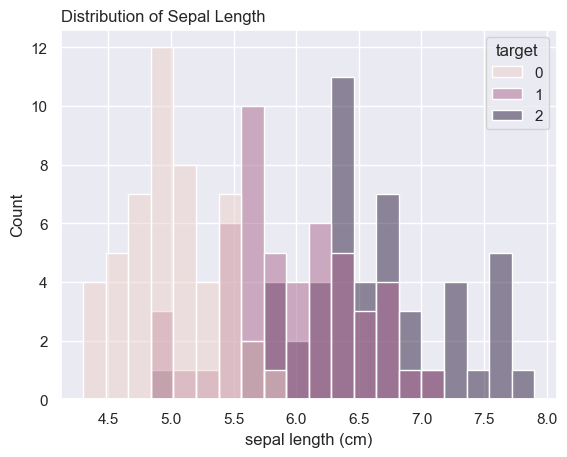

In [34]:
# Change style of seaborn plots
sns.set()

# Create histogram of sepal length
sns.histplot(x=iris.data['sepal length (cm)'], hue=iris['target'], bins=20)
plt.title('Distribution of Sepal Length', loc='left')

#### Interpreting histograms
When looking at histograms, we'd like to generally assess the following attributes of our data:
  * **Distribution modes**: What are the frequently occurring values for a given feature? Are those values realistic?
    * In the example above, each species tends to have a different mode for sepal length.
  * **Distribution skew**: Is a distribution symmetrical? This tends to show us how data can be biased.
    * The distribution of sepal length for each Iris species is skewed differently, and not perfectly symmetrical.
  * **Outliers**: Are there data points that deviate significantly from the majority?
    * This is difficult to assess in the case above without performing a rigorous statistical analysis.
  * **Separability of classes**: Can you visually assess whether or not the distributions are different enough from each other? 
    * This suggests (but does not guarantee) that a model can separate the data into classes.
    * Based on the modes, it does suggest that we can separate the species from one another. However, there is considerable overlap, which suggests that there may be certain plants that are harder to discern.
  * **The range and spread of values**: This allows you to get an idea of the range of values covered by a feature.
    * We're covering a fairly small range of values.

#### Exercise 2: Draw histograms for other attributes in the Iris dataset. Is it easy to visually see differences in each targets’ distribution? 

Text(0.0, 1.0, 'Distribution of Sepal Length')

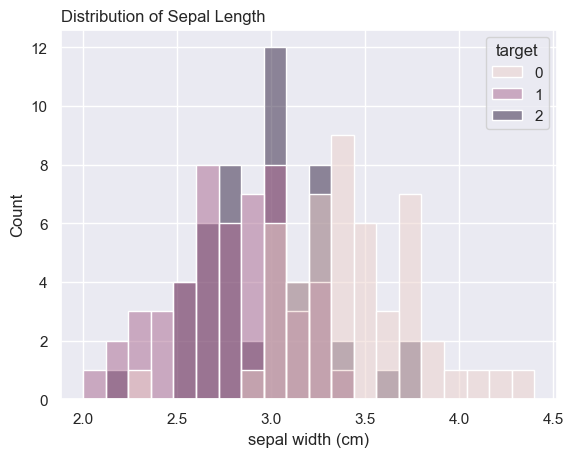

In [35]:
sns.histplot(x=iris.data['sepal width (cm)'], hue=iris['target'], bins=20)
plt.title('Distribution of Sepal Length', loc='left')

Text(0.0, 1.0, 'Distribution of Sepal Length')

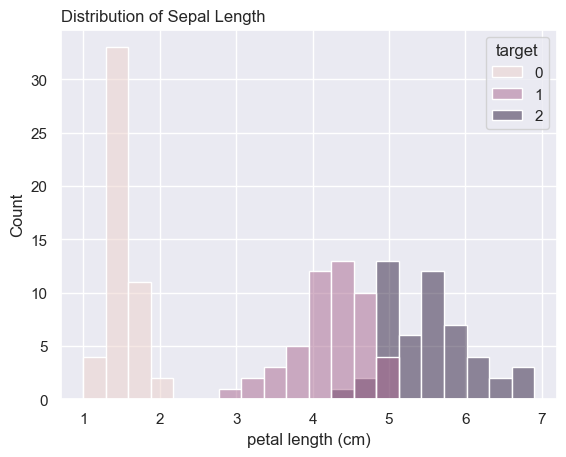

In [36]:
sns.histplot(x=iris.data['petal length (cm)'], hue=iris['target'], bins=20)
plt.title('Distribution of Sepal Length', loc='left')

Text(0.0, 1.0, 'Distribution of Sepal Length')

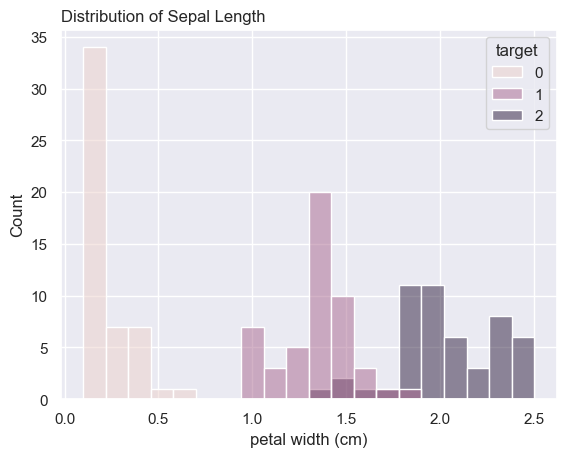

In [37]:
sns.histplot(x=iris.data['petal width (cm)'], hue=iris['target'], bins=20)
plt.title('Distribution of Sepal Length', loc='left')

### Pairplots
A **pairplot** aims to plot the pairwise relationship between features in a dataset. 
* It returns a grid of histograms and scatter plots. 
* Each element in the x and y axis represents a different feature. 
  * A **histogram** is shown when the two axes contain the same feature (e.g. x = sepal_width and y = sepal_width). 
  * A **scatter plot** is shown when the two axes contain different features, showing their pairwise relationship (e.g. x = sepal_width and y = sepal_length). 

Note that the off-diagonal plots (plots separated by the histograms) show duplicate information, except the axes are flipped. 

To get the pairplot code to work, we need to first combine the data objects into a dataframe. We'll store the contents of the dataframe in the variable `df`.

In [45]:
df = pd.concat([iris.data, iris.target], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now we can show the pairwise distribution of each feature, separated by the `target` variable using the `pairplot` method in Seaborn.

/Users/scottcampit/Projects/intro-to-ml/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


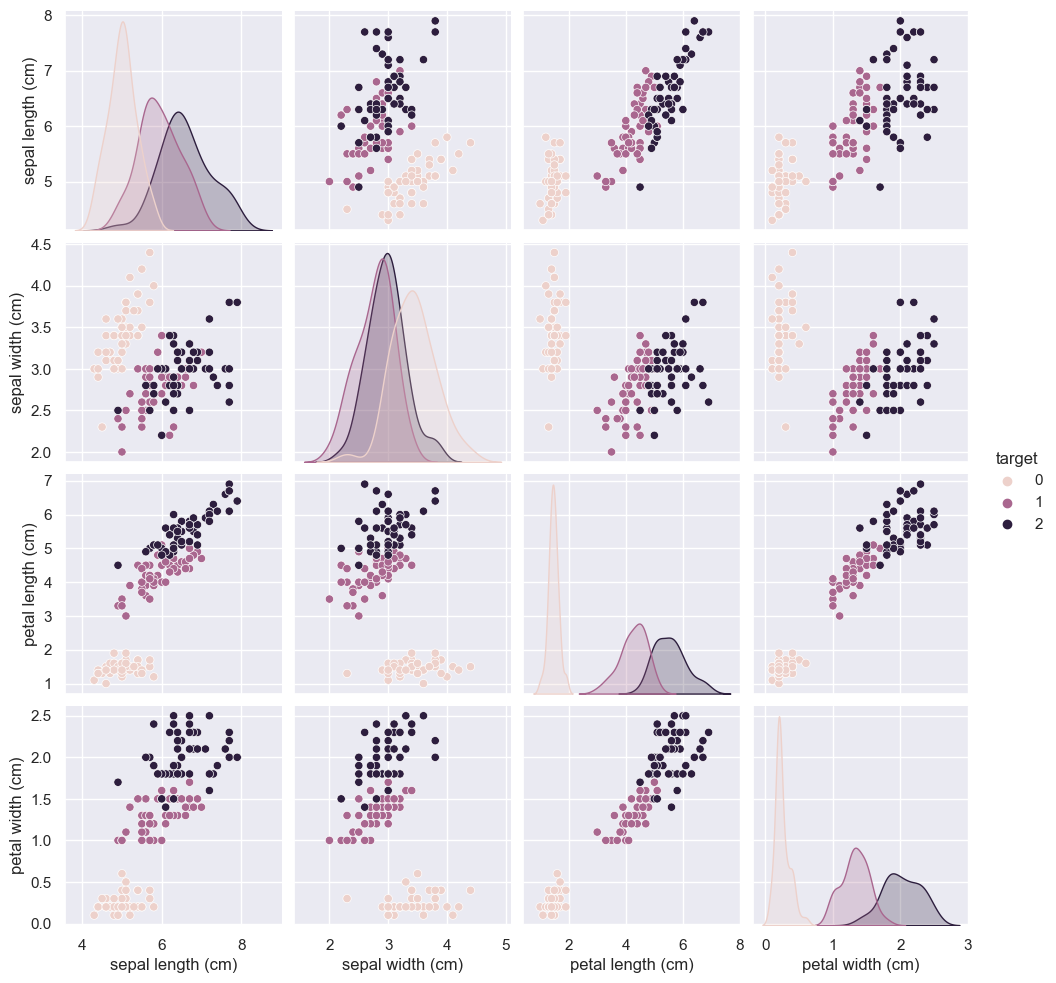

In [46]:
sns.pairplot(data=df, hue='target')

## 5. Training a K-Means Clustering Algorithm

### Intuition for K-Means Clustering
Things that belong in the same category tend to have similar attributes. In other words, things that belong to the same category tend to have smaller differences in feature values between other members of the same category. Things that belong in different categories will have larger differences in feature values.

- For example above, consider two Iris Setosa plants. They are more likely to be close in Sepal Length, Sepal Width, Petal Length, and Petal Width, compared to those of Iris Versicolour or Iris Virginica.

Using this intuition, we can now understand big picture of what the K-means algorithm is trying to learn. The K-means algorithm aims to learn the best way to group samples together by minimizing the difference between a given sample (a single Iris Setosa plant) and the average of the samples in a cluster (the average of all Iris Setosa plants). 

There’s more to the algorithm in a mathematical sense, but that is outside the scope of this lesson, and you’re well equipped to apply K-means clustering to real data.

### Training a K-Means Algorithm using `scikit-learn`
Let’s train our first ML model! Luckily, scikit-learn already has coded the math for the K-means clustering algorithm. You can load it using the following code:

In [47]:
from sklearn.cluster import KMeans

An important note about the K-means algorithm is that we need to tell it how many groups there are in the dataset, before it learns how to assign each sample to a group. Intuitively, since there are three classes of Iris flowers, we should tell K-means that there are 3 potential clusters in the data:

In [48]:
model = KMeans(n_clusters=3)

The code that actually trains the K-means algorithm is stored in the class object we call `model`. This object contains the method `fit_predict()`. By providing this method the training data, it will fit the model, and output a prediction of each class. We'll store the model predictions in the variable `kmeans_pred`. 

In [49]:
kmeans_pred = model.fit_predict(iris.data)

/Users/scottcampit/Projects/intro-to-ml/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Now the predictions we got from K-means clustering don't actually represent the labels in the original dataset. The code below performs a mapping between the true labels and the ones predicted by the model. You don't need to worry about the details.

In [58]:
import numpy as np

# Predict the cluster labels
predicted_labels = model.labels_

# Create a mapping from predicted labels to true labels
label_mapping = {}
for cluster in np.unique(predicted_labels):
    cluster_labels = iris.target[predicted_labels == cluster]
    mapped_label = np.argmax(np.bincount(cluster_labels))
    label_mapping[cluster] = mapped_label

# Map the predicted labels to the true labels
mapped_predicted_labels = np.array([label_mapping[cluster] for cluster in predicted_labels])

# Print the mapped predicted labels
print("Mapped Predicted Labels:", mapped_predicted_labels)

Mapped Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


## 6. Evaluating K-Means Model Predictions

### Method 1: Eye-balling the predictions against the true labels
Let's view the contents of the model prediction:

In [59]:
print(f"Predicted clusters: \n {mapped_predicted_labels}")

Predicted clusters: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Let's also view it in the context of our actual target variables:

In [60]:
print(f"Actual target labels: \n {iris.target.values}")

Actual target labels: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


From eye-balling the two lists above, it looks like the model did a pretty good job of separating out the three species of Iris plants! 

### Method 

## 7. Challenges with evaluating unsupervised learning algorithms

- Lack of objective evaluation metrics
- Subjective to interpretation
- Instability in predictions

### Exercise 4: Try running the K-means training and visualization code again. Did anything change? How can you ensure that you get reproducible results?

**Hint:** Search `reproducible results` in this documentation: https://scikit-learn.org/stable/common_pitfalls.html

## Resources and recommended reading